 **Title: Relating Gross Domestic Product and Life Expectancy to COVID-19 Cases and Deaths** 
 
 
**Introduction:**

Since late 2019, SARS-CoV-2 has been circulating and infecting people worldwide. This pandemic has brought with it innumerable effects to our societies. Individual nations responded to this pandemic in different ways based on political inclinations, development, and available resources. Two important factors to consider when comparing country responses are life expectancies and Gross Domestic Products (GDP). The life expectancy for a particular country is defined as the average number of years someone is expected to live. A country’s GDP is defined as the “total market value of the goods and services produced by a country’s economy during a period of time” (Bodarenko, 2017), used as a measure of a country’s economy. These factors may be indicative of a nation’s capacity to manage crises, such as the COVID-19 pandemic, and help predict health outcomes. One way to see how well a nation has been able to deal with the pandemic is by tracking how many cases it has had. With this in mind, the question can a country’s GDP and life expectancy be used to predict how many total SARS-CoV-2 cases will have? is raised. This investigation will be conducted using data on coronavirus statistics reported daily from the University of Oxford.

**Methods:**

From the data set, the analysis will use the columns: Date, Total Cases, Location, Cases per Million, Total deaths, Total Deaths per million, Life expectancy, GDP per Capita, and Human Development Index. Since the data set (and total case counts) are updated daily, only use data available from the start of reporting up to February 28th, 2022 will be used. Further, the analysis will be limited to only North American countries. Data entries containing NA values will be searched online and manually added. From this data frame, the tidied data will be used to visualize the correlation between GDP, life expectancy, and case/death numbers. After the visualization step, a regression model can be applied to make predictions about the relationship between GDP and life expectancy, and COVID-19 rates. 

**Expected outcomes and significance:**

Through this data exploration, the relationship between a country's GDP and life expectancy, and COVID-19 cases or deaths experienced will be investigated. Whether these factors are predictive of a country’s COVID-19 cases/deaths will be determined. This data could be used as a model for how resources and aid are distributed between countries if another pandemic were to arise. For example, if a strong negative relationship between GDP and COVID-19 cases/deaths is discovered, it could be recommended that more aid be allocated to lower GDP countries. 
This exploration is only a small step in recognizing patterns between socioeconomic factors and health: prompting multiple questions about how exactly GDP and life expectancy are related to how a country may handle a pandemic. For example: does the distribution of GDP funds play a stronger role than the total amount of funding?


**Citation**

Bondarenko, P. (2017, February 28). gross domestic product. Encyclopedia Britannica. https://www.britannica.com/topic/gross-domestic-product 



In [2]:
library(tidyverse)
library(tidymodels)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
covid_data <- read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  iso_code = col_character(),
  continent = col_character(),
  location = col_character(),
  date = col_date(format = ""),
  icu_patients = col_logical(),
  icu_patients_per_million = col_logical(),
  hosp_patients = col_logical(),
  hosp_patients_per_million = col_logical(),
  weekly_icu_admissions = col_logical(),
  weekly_icu_admissions_per_million = col_logical(),
  weekly_hosp_admissions = col_logical(),
  weekly_hosp_admissions_per_million = col_logical(),
  new_tests = col_logical(),
  total_tests = col_logical(),
  total_tests_per_thousand = col_logical(),
  new_tests_per_thousand = col_logical(),
  new_tests_smoothed = col_logical(),
  new_tests_smoothed_per_thousand = col_logical(),
  positive_rate = col_logical(),
  tests_per_case = col_logical()
  # ... with 10 more columns
)

See spec(...) for full column specifications.

Warning message:
“1172334 parsing failures.
 row                        col           

In [17]:
# FILTER RELEVANT COLS

filtered_covid_data <- filter(covid_data, continent == "North America", date == "2022-02-28")
relevant_covid_data <- filtered_covid_data %>% 
            select(location, date, total_cases, total_cases_per_million, total_deaths, 
                   total_deaths_per_million, life_expectancy, gdp_per_capita, human_development_index) %>% 
            filter(!is.na(total_cases))
#Data with NA values
relevant_covid_data

location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,life_expectancy,gdp_per_capita,human_development_index
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anguilla,2022-02-28,2555,168925.620,9,595.041,81.88,NA,NA
Antigua and Barbuda,2022-02-28,7437,75328.174,135,1367.393,77.02,21490.943,0.778
Aruba,2022-02-28,33684,314231.074,211,1968.375,76.29,35973.781,NA
Bahamas,2022-02-28,33135,83481.560,771,1942.486,73.92,27717.847,0.814
Barbados,2022-02-28,55165,191739.541,316,1098.336,79.19,16978.068,0.814
Belize,2022-02-28,56694,140014.571,650,1605.275,74.62,7824.362,0.716
Bermuda,2022-02-28,11561,186191.458,123,1980.932,82.59,50669.315,NA
Bonaire Sint Eustatius and Saba,2022-02-28,7582,286708.262,31,1172.244,77.79,NA,NA
British Virgin Islands,2022-02-28,6085,200013.148,62,2037.932,79.07,NA,NA


In [18]:
# CHANGING NA VALUES

# GDP values searched online. 
mty_list_gdp = c(17226, NA, NA, NA, NA, NA, NA, 24200, 34246, NA, NA, NA, 6630, 19701, NA, NA, NA, 54470.96, 
             NA, NA, NA, NA, NA, NA, 13523, NA, NA, NA, NA, 46200, NA, NA, 23879.93, NA)

# Possibly change 46200 value, since Saint Pierre and Miquelon's gdp is an old estimate (2006)
# Value
# Human Development Index Values searched online
mty_list_hdi = c(0.865, NA, 0.908, NA, NA, NA, 0.981, 0.944, 0.945, NA, 0.888, NA , NA, 0.811, NA, NA, NA, 
                 0.839, NA, NA, NA, NA, NA, NA, 0.821, NA, NA, NA, NA, 0.788, NA, NA, 0.873, NA)

gdp = relevant_covid_data$gdp_per_capita
new_gdp = coalesce(gdp, mty_list_gdp)

hdi = relevant_covid_data$human_development_index
new_hdi = coalesce(hdi, mty_list_hdi)

tidy_covid_data = relevant_covid_data
tidy_covid_data$gdp_per_capita = new_gdp
# tidy_covid_data

tidy_covid_data$human_development_index = new_hdi
tidy_covid_data
#

location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,life_expectancy,gdp_per_capita,human_development_index
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anguilla,2022-02-28,2555,168925.620,9,595.041,81.88,17226.000,0.865
Antigua and Barbuda,2022-02-28,7437,75328.174,135,1367.393,77.02,21490.943,0.778
Aruba,2022-02-28,33684,314231.074,211,1968.375,76.29,35973.781,0.908
Bahamas,2022-02-28,33135,83481.560,771,1942.486,73.92,27717.847,0.814
Barbados,2022-02-28,55165,191739.541,316,1098.336,79.19,16978.068,0.814
Belize,2022-02-28,56694,140014.571,650,1605.275,74.62,7824.362,0.716
Bermuda,2022-02-28,11561,186191.458,123,1980.932,82.59,50669.315,0.981
Bonaire Sint Eustatius and Saba,2022-02-28,7582,286708.262,31,1172.244,77.79,24200.000,0.944
British Virgin Islands,2022-02-28,6085,200013.148,62,2037.932,79.07,34246.000,0.945


In [19]:
# SUMMARY TABLE of AVERAGES

summary_table = tidy_covid_data %>% select(!c("date", "location"))

# COUNT NA VALUES
na_obs = summary_table %>% map(~sum(is.na(.)))

summary_table = summary_table %>% 
                    map_df(mean, na.rm=TRUE)
summary_table = summary_table %>% 
                pivot_longer(cols = total_cases:human_development_index,
                            names_to = "Predictors",
                            values_to = "Average")

summary_table = summary_table %>% 
                mutate(na_observations = na_obs)
summary_table

Predictors,Average,na_observations
<chr>,<dbl>,<named list>
total_cases,2.737371e+06,0
total_cases_per_million,1.298288e+05,0
total_deaths,4.053235e+04,0
total_deaths_per_million,1.202175e+03,0
life_expectancy,7.653059e+01,0
gdp_per_capita,2.215872e+04,0
human_development_index,7.955882e-01,0


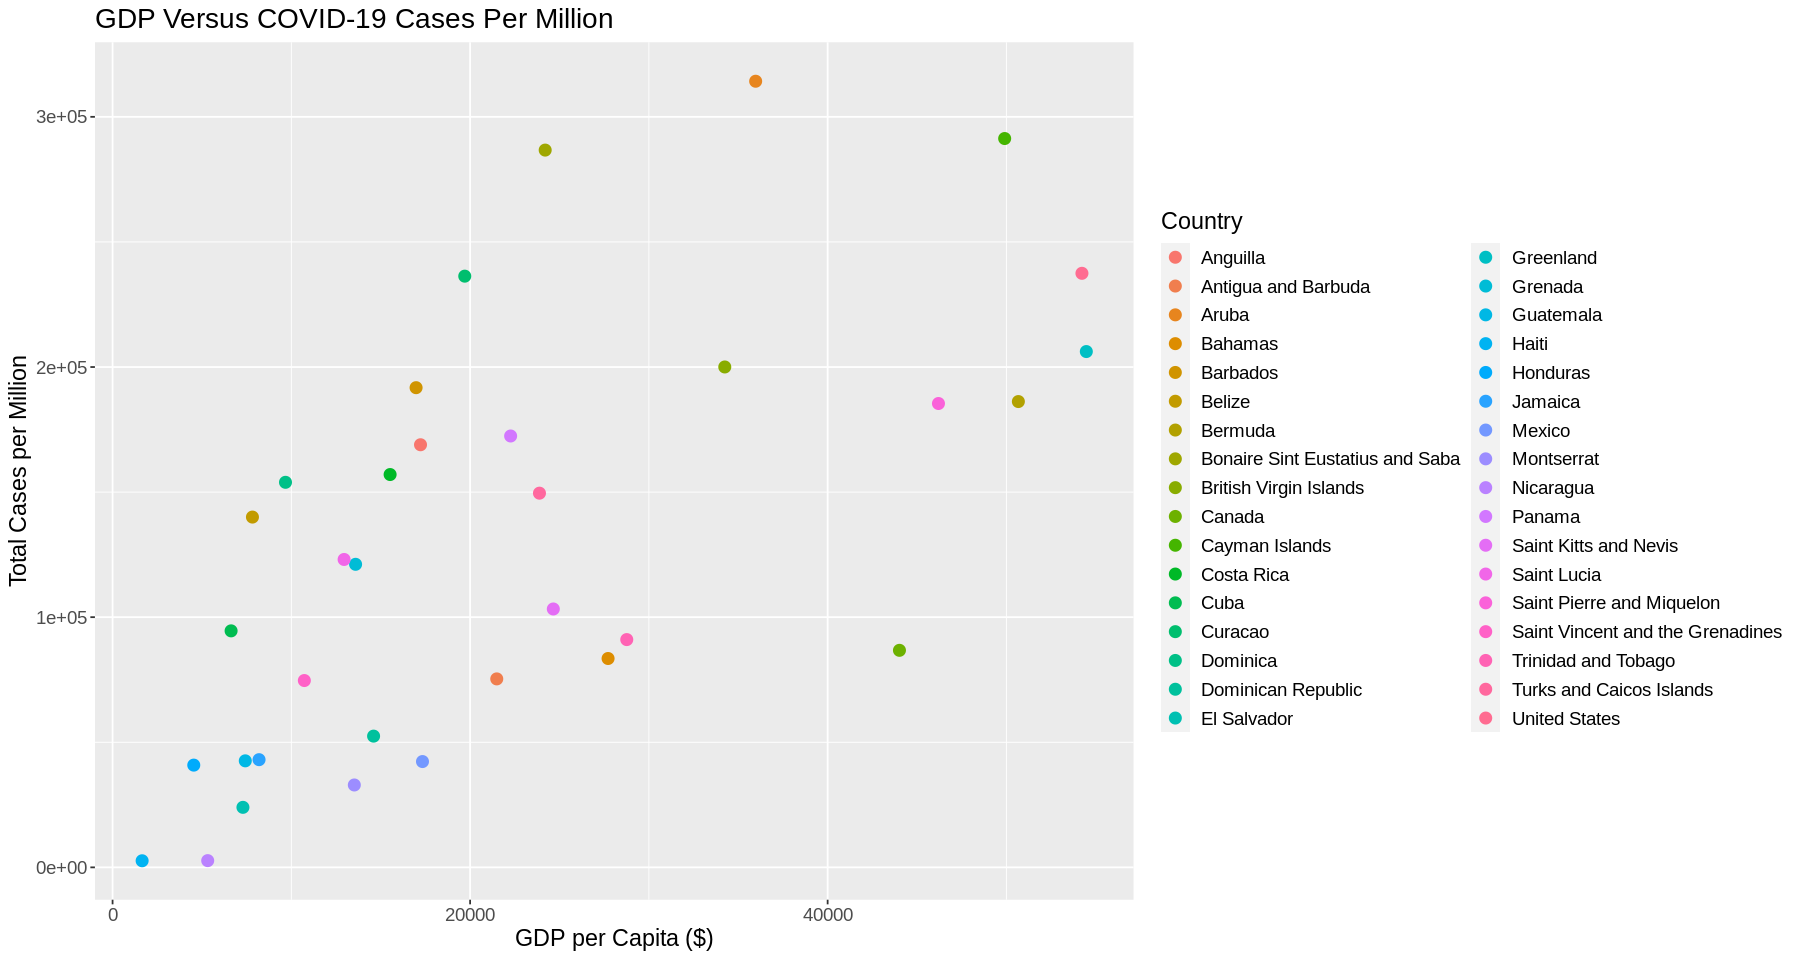

In [20]:
#resize
options(repr.plot.width = 15, repr.plot.height = 8)
#GDP plot of total cases per million and GDP per capita
proposal_plot_GDP_to_Covid_rates <- tidy_covid_data %>% 
                    ggplot(aes(x = gdp_per_capita, y = total_cases_per_million, color = location)) + geom_point(size = 3) +
                    labs(x = "GDP per Capita ($)", y = "Total Cases per Million", color = "Country") +
                    ggtitle("GDP Versus COVID-19 Cases Per Million") +
                    theme(text = element_text(size = 14))
proposal_plot_GDP_to_Covid_rates